<a href="https://colab.research.google.com/github/SadeemAlasiri/Ex_week3/blob/main/Copy_of_Stacking_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacking Exercise

In this exercise, you will explore the Stacking technique applied to classification. Stacking (stacked generalization) is an ensemble learning method that combines multiple classification models via a meta-classifier. The base level models are trained based on a complete training set, then a meta-model is trained on the outputs of the base level model as features.

## Dataset
We will use the Wine dataset for this exercise. This dataset consists of chemical analyses of wines grown in the same region in Italy but derived from three different cultivars. **Feel free to use another dataset!!**

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement a stacking model using various classifiers as base learners and one as a meta-classifier.
4. Evaluate the model performance.

Please fill in the following code blocks to complete the exercise.

In [1]:
import pandas as pd # ناديت جميع المكتبات
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

### Load the dataset

In [5]:
# Load the dataset
#  نحمل داتا سيت من الرابط لها
# تكون النهايه للداتا csv.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']# اعطيته اسماء لل  الاعمده
# 9الحمل1- الجلكوز2 -ضغط الدم3 -سمك الجلد4- الانسولين5 -موشر كتله الجسم6 -مرض السكري الوراثي7 -عمر8-المحصول
data = pd.read_csv(url, names=columns)# قريت البيانات


### Preprocess the data (if necessary)

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.isna().sum()# هنا مافي نل بس في قيم فيها صفر وهي تعتبر قيم فاضيه

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [14]:
data['Glucose'].value_counts(sort=True)

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [13]:
data['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

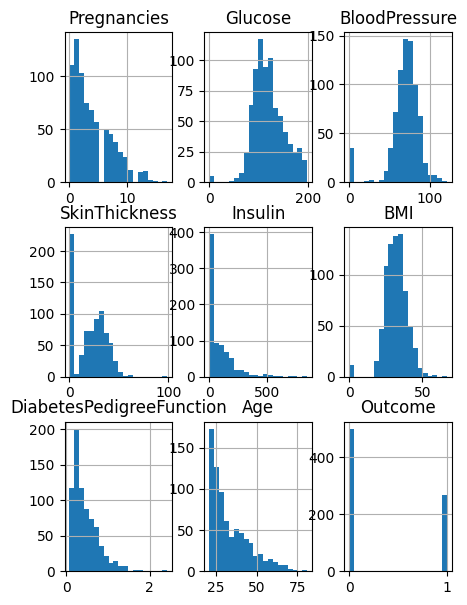

In [15]:
data.hist(bins=20,figsize=(5,7));

### Split the data

In [17]:
# Split the data into features and target variable
# حددت الاكس و الواي حذفت الواي من الاكس
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [18]:
#هنا انا قسمتها و عطيتها نسبه للاختبار و كم مره يقر ياخذ الراندوم
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale the features هنا سويت الاسكالير و سويتفيت للاكس ترين
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Implement a stacking model

In [20]:
# Initialize base models
# هنا استخدمت موديل
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42))
]

# Initialize the meta-model
meta_model = LogisticRegression()

In [21]:
# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)# اختصار للكروس فليديشن cv

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('random_forest',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [22]:
# Make predictions on the test data
predictions = stacking_classifier.predict(X_test)

### Evaluate the model performance

In [23]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Stacking Classifier Model Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Model Accuracy: 73.38%
